In [1]:
# !pip install --upgrade matplotlibx

In [2]:
!pip install cmocean

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 223 kB 12.6 MB/s 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import cmocean
import cmocean.cm as cmo
import pandas
import statsmodels.api as sm
from ast import literal_eval
import scipy

In [4]:
sns.set_theme('paper')
sns.set_style('darkgrid')

In [5]:
import matplotlib
print(matplotlib.__version__)

3.2.2


In [6]:
race_code = {
    'W': 'White',
    'A': 'Asian',
    'B': 'Black',
    'I': 'Indigenous',
    'L': 'Latinx',
    'NL+O': 'Not H/L, Other',
    'HL+O': 'H/L, Other',
    'NL+M': 'Not H/L, More',
    'HL+M': 'H/L, More'
}

In [7]:
race_path = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data/cleaned_race_name.csv'
predicted_race = pd.read_csv(race_path, index_col=0)
predicted_race['NEW_ACTOR_RACE'] = predicted_race['NEW_ACTOR_RACE'].str.upper()
predicted_race['race_agg'] = predicted_race.apply(lambda x: race_code[x.NEW_ACTOR_RACE], axis=1)
predicted_race['primaryName'] = predicted_race['first_name'] + ' ' + predicted_race['last_name']
predicted_race.head()

,first_name,last_name,NEW_ACTOR_RACE,race,nconst,race_agg,primaryName
0,Lauren,Bacall,W,NL+W,nm0000002,White,Lauren Bacall
1,Marlon,Brando,W,HL+W,nm0000008,White,Marlon Brando
2,Gong,Li,A,NL+A,nm0000084,Asian,Gong Li
3,Armin,Mueller-Stahl,W,NL+W,nm0000090,White,Armin Mueller-Stahl
4,John,Cleese,I,NL+I,nm0000092,Indigenous,John Cleese


In [8]:
principals_path = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data/principals.csv'
principals = pd.read_csv(principals_path)
principals.head(2)

,tconst,ordering,nconst,category,job,characters
0,tt0035423,1,nm0000212,actress,\N,"[""Kate McKay""]"
1,tt0035423,2,nm0413168,actor,\N,"[""Leopold""]"


In [9]:
relevant_path = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data/relevant_names.csv'
relevant_names = pd.read_csv(relevant_path)
print(relevant_names.shape)
relevant_names.head(2)

(5272, 6)


,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0038355,tt0071877,tt0117057"
1,nm0000008,Marlon Brando,1924,2004,"actor,soundtrack,director","tt0070849,tt0078788,tt0068646,tt0047296"


In [10]:
tmp = principals[['nconst', 'category']].drop_duplicates()
profession_dict = dict(zip(tmp.nconst, tmp.category))

In [11]:
profession_dict['nm0000115']

'actor'

In [12]:
df = predicted_race[['nconst', 'primaryName', 'race_agg']]
df.head()

,nconst,primaryName,race_agg
0,nm0000002,Lauren Bacall,White
1,nm0000008,Marlon Brando,White
2,nm0000084,Gong Li,Asian
3,nm0000090,Armin Mueller-Stahl,White
4,nm0000092,John Cleese,Indigenous


In [13]:
df['profession'] = df.apply(lambda x: profession_dict[x.nconst], axis=1)
# df['profession'] = df.apply(lambda x: 'Male' if x.prof == 'actor' else 'Female', axis=1)
df.head()

<ipython-input-13-b69f9629a782>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['profession'] = df.apply(lambda x: profession_dict[x.nconst], axis=1)


,nconst,primaryName,race_agg,profession
0,nm0000002,Lauren Bacall,White,actress
1,nm0000008,Marlon Brando,White,actor
2,nm0000084,Gong Li,Asian,actress
3,nm0000090,Armin Mueller-Stahl,White,actor
4,nm0000092,John Cleese,Indigenous,actor


In [14]:
df.race_agg.value_counts()

White             2592
Black              727
Not H/L, Other     518
Asian              490
Not H/L, More      318
Indigenous         263
H/L, Other         237
H/L, More           98
Latinx              29
Name: race_agg, dtype: int64

In [15]:
# def get_agg_race(race):
#   chars = ['W', 'B', 'A', 'I', 'L']
#   for c in chars:
#     if race.endswith(c):
#       return c
#   return race

In [16]:
# df['race_agg'] = df.apply(lambda x: get_agg_race(x.race), axis=1)
# df.head()

# Counts

In [17]:
df_count = df.groupby(by=['profession', 'race_agg']).count().reset_index()
df_count

,profession,race_agg,nconst,primaryName
0,actor,Asian,290,290
1,actor,Black,426,426
2,actor,"H/L, More",55,55
3,actor,"H/L, Other",126,126
4,actor,Indigenous,164,164
5,actor,Latinx,16,16
6,actor,"Not H/L, More",209,209
7,actor,"Not H/L, Other",328,328
8,actor,White,1630,1630
9,actress,Asian,200,200


In [18]:
df_count_pivot = df_count.pivot_table(index='race_agg', columns='profession', values='nconst')
df_count_pivot

profession,actor,actress
race_agg,,
Asian,290,200
Black,426,301
"H/L, More",55,43
"H/L, Other",126,111
Indigenous,164,99
Latinx,16,13
"Not H/L, More",209,109
"Not H/L, Other",328,190
White,1630,962


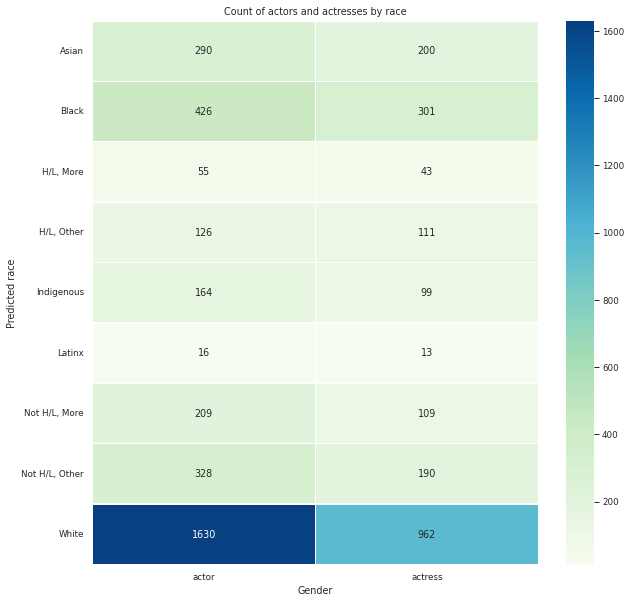

In [19]:
plt.figure(figsize=(10, 10))

sns.heatmap(df_count_pivot, linewidths=0.3, annot=True, fmt='n', cmap='GnBu')
plt.xlabel('Gender')
plt.ylabel('Predicted race')
plt.title('Count of actors and actresses by race')

plt.show()

# Number of previous roles
# Career age

In [20]:
# prev_roles_path = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data/Newer data/prev_signficant_roles_3.csv'
# prev_roles = pd.read_csv(prev_roles_path)
# prev_roles.prev_movies = prev_roles.prev_movies.apply(literal_eval)
# prev_roles.prev_movies_ratings = prev_roles.prev_movies_ratings.apply(literal_eval)
# prev_roles.prev_movies_numvotes = prev_roles.prev_movies_numvotes.apply(literal_eval)
# print(prev_roles.shape)
# prev_roles.head()

In [21]:
# birthyear_dict = dict(zip(relevant_names.nconst, relevant_names.birthYear))

In [22]:
# prev_roles['birthYear'] = prev_roles.apply(lambda x: birthyear_dict[x.nconst], axis=1)
# prev_roles.head(2)

In [23]:
# tmp = prev_roles[['tconst', 'startYear']].drop_duplicates()
# movie_startyear = dict(zip(tmp.tconst, tmp.startYear))

In [24]:
# movie_startyear['tt1371111'] # Cloud Atlas

In [25]:
# roles_count_df = prev_roles.groupby('nconst').count().reset_index()[['nconst', 'tconst']]
# print(roles_count_df.shape)
# roles_count_df.head()

In [26]:
# roles_count_dict = dict(zip(roles_count_df['nconst'], roles_count_df['tconst']))

In [27]:
# df['roles_count'] = df.apply(lambda x: roles_count_dict[x.nconst], axis=1)
# df.head(20)

In [28]:
career_path = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data/career_length.csv'
career_length = pd.read_csv(career_path)
career_length.head()

,nconst,startYear,latestYear,length,profession,birthYear,currentYear,age,totalMovies
0,nm0000212,1986.0,2015.0,29.0,actress,1961.0,2022,61.0,29
1,nm0413168,1999.0,2022.0,23.0,actor,1968.0,2022,54.0,32
2,nm0000630,1996.0,2019.0,23.0,actor,1967.0,2022,55.0,29
3,nm0005227,1997.0,2021.0,24.0,actor,1974.0,2022,48.0,15
4,nm0060931,1943.0,2001.0,58.0,actress,1918.0,2007,89.0,6


In [29]:
total_movies_dict = dict(zip(career_length['nconst'], career_length['totalMovies']))

In [30]:
df['totalMovies'] = df.apply(lambda x: total_movies_dict[x.nconst], axis=1)
df.head(20)

<ipython-input-30-e07285131044>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['totalMovies'] = df.apply(lambda x: total_movies_dict[x.nconst], axis=1)


,nconst,primaryName,race_agg,profession,totalMovies
0,nm0000002,Lauren Bacall,White,actress,36
1,nm0000008,Marlon Brando,White,actor,38
2,nm0000084,Gong Li,Asian,actress,29
3,nm0000090,Armin Mueller-Stahl,White,actor,30
4,nm0000092,John Cleese,Indigenous,actor,27
5,nm0000093,Brad Pitt,White,actor,46
6,nm0000095,Woody Allen,White,actor,32
7,nm0000096,Gillian Anderson,"H/L, More",actress,16
8,nm0000097,Pamela Anderson,Black,actress,8
9,nm0000098,Jennifer Aniston,White,actress,33


In [31]:
career_length_dict = dict(zip(career_length['nconst'], career_length['length']))
df['careerLength'] = df.apply(lambda x: career_length_dict[x.nconst], axis=1)
df.head(20)

<ipython-input-31-6cd15c7db601>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['careerLength'] = df.apply(lambda x: career_length_dict[x.nconst], axis=1)


,nconst,primaryName,race_agg,profession,totalMovies,careerLength
0,nm0000002,Lauren Bacall,White,actress,36,68.0
1,nm0000008,Marlon Brando,White,actor,38,51.0
2,nm0000084,Gong Li,Asian,actress,29,32.0
3,nm0000090,Armin Mueller-Stahl,White,actor,30,46.0
4,nm0000092,John Cleese,Indigenous,actor,27,50.0
5,nm0000093,Brad Pitt,White,actor,46,34.0
6,nm0000095,Woody Allen,White,actor,32,47.0
7,nm0000096,Gillian Anderson,"H/L, More",actress,16,21.0
8,nm0000097,Pamela Anderson,Black,actress,8,23.0
9,nm0000098,Jennifer Aniston,White,actress,33,26.0


In [32]:
career_length[career_length['nconst'] == 'nm0000106']

,nconst,startYear,latestYear,length,profession,birthYear,currentYear,age,totalMovies
385,nm0000106,1982.0,2020.0,38.0,actress,1975.0,2022,47.0,37


In [33]:
df['avgMovies'] = df.totalMovies / df.careerLength
df.head(2)

,nconst,primaryName,race_agg,profession,totalMovies,careerLength,avgMovies
0,nm0000002,Lauren Bacall,White,actress,36,68.0,0.529412
1,nm0000008,Marlon Brando,White,actor,38,51.0,0.745098


In [34]:
df_mean = df.groupby(by=['profession', 'race_agg']).mean().reset_index()
df_mean

,profession,race_agg,totalMovies,careerLength,avgMovies
0,actor,Asian,8.279310,10.510345,0.658582
1,actor,Black,7.309859,12.068075,0.583208
2,actor,"H/L, More",5.072727,9.927273,0.509502
3,actor,"H/L, Other",5.674603,10.063492,0.524142
4,actor,Indigenous,5.512195,11.158537,0.493883
5,actor,Latinx,21.187500,23.000000,0.899184
6,actor,"Not H/L, More",4.296651,9.330144,0.503772
7,actor,"Not H/L, Other",6.710366,10.954268,0.608926
8,actor,White,13.581595,17.902454,0.697463
9,actress,Asian,5.715000,9.400000,0.627244


In [35]:
df_total_pivot = df_mean.pivot_table(index='race_agg', columns='profession', values='totalMovies')
df_total_pivot

profession,actor,actress
race_agg,,
Asian,8.279310,5.715000
Black,7.309859,6.186047
"H/L, More",5.072727,6.023256
"H/L, Other",5.674603,4.639640
Indigenous,5.512195,4.565657
Latinx,21.187500,17.846154
"Not H/L, More",4.296651,4.339450
"Not H/L, Other",6.710366,6.457895
White,13.581595,11.160083


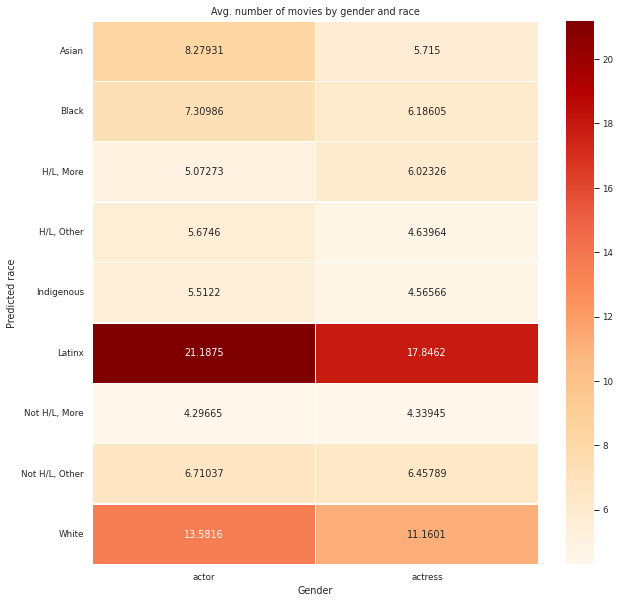

In [36]:
plt.figure(figsize=(10, 10))

sns.heatmap(df_total_pivot, linewidths=0.3, annot=True, fmt='n', cmap='OrRd')
plt.xlabel('Gender')
plt.ylabel('Predicted race')
plt.title('Avg. number of movies by gender and race')

plt.show()

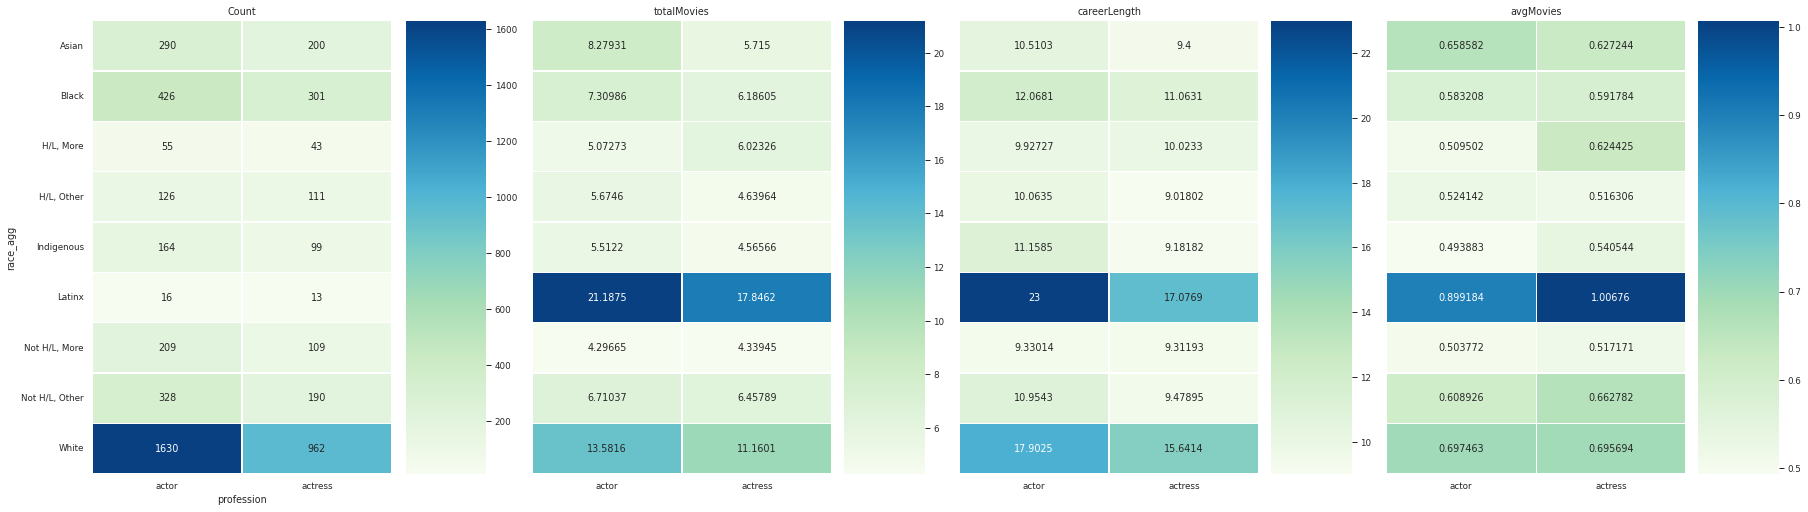

In [37]:
cols = ['totalMovies', 'careerLength', 'avgMovies']
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(25, 7), sharex=True, sharey=True, constrained_layout=True)

sns.heatmap(df_count_pivot, linewidths=0.3, annot=True, fmt='n', cmap='GnBu', ax=ax[0])
ax[0].title.set_text('Count')

for idx, col in enumerate(cols):
  tmp_pivot = df_mean.pivot_table(index='race_agg', columns='profession', values=col)
  sns.heatmap(tmp_pivot, linewidths=0.3, annot=True, fmt='n', cmap='GnBu', ax=ax[idx+1])
  ax[idx+1].title.set_text(col)
  ax[idx+1].yaxis.set_tick_params(labelleft=False)
  ax[idx+1].set_xlabel('')
  ax[idx+1].set_ylabel('')

# f.supxlabel('Gender')
# f.supylabel('Predicted race')

plt.show()

# Mean and STD

In [38]:
df.head(2)

,nconst,primaryName,race_agg,profession,totalMovies,careerLength,avgMovies
0,nm0000002,Lauren Bacall,White,actress,36,68.0,0.529412
1,nm0000008,Marlon Brando,White,actor,38,51.0,0.745098


In [87]:
total_movies = df.groupby(by=['profession', 'race_agg'])['totalMovies'].agg(['mean', 'std']).reset_index()
total_movies

,profession,race_agg,mean,std
0,actor,Asian,8.27931,17.65631
1,actor,Black,7.30986,12.89223
2,actor,"H/L, More",5.07273,8.52199
3,actor,"H/L, Other",5.67460,8.35878
4,actor,Indigenous,5.51220,8.62262
5,actor,Latinx,21.18750,17.90798
6,actor,"Not H/L, More",4.29665,5.87433
7,actor,"Not H/L, Other",6.71037,9.82375
8,actor,White,13.58160,16.55222
9,actress,Asian,5.71500,7.72542


## Total movies

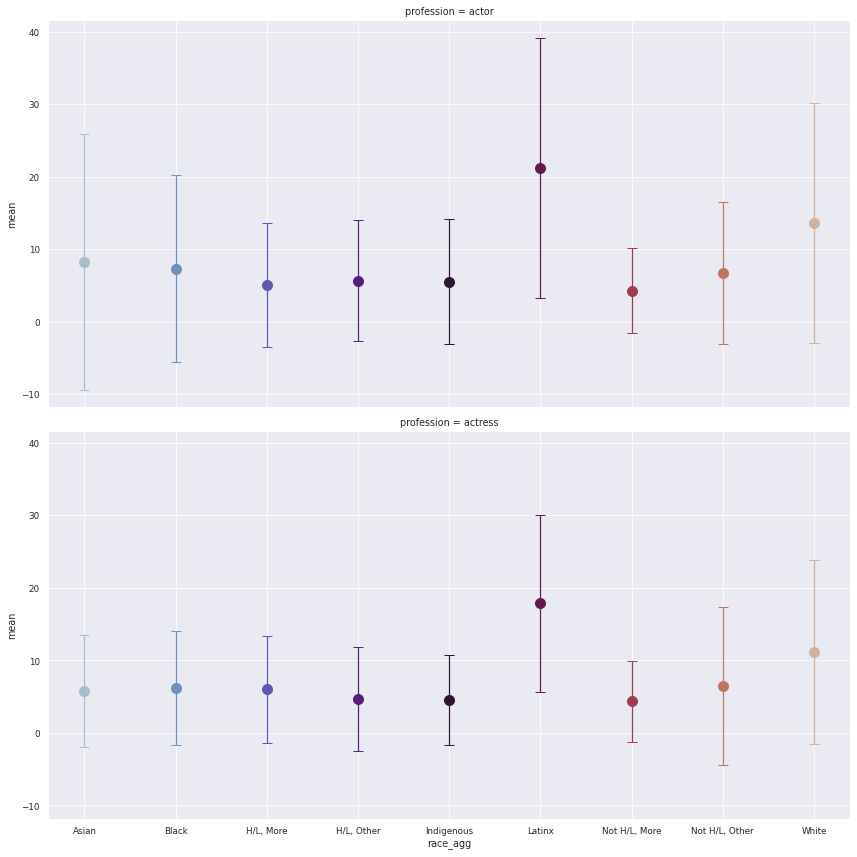

In [88]:
fig = sns.FacetGrid(total_movies, row='profession', hue='race_agg', height=6, aspect=2, palette='twilight')
# plt.scatter(movies_actor.race_agg, movies_actor['totalMovies']['mean'])
# fig.map(plt.scatter, 'race_agg', 'mean')
fig.map(plt.errorbar, 'race_agg', 'mean', 'std', fmt='o', capsize=5, markersize=10)
# fig.add_legend()

# plt.title('Total movies')

plt.show()

In [41]:
df.head(2)

,nconst,primaryName,race_agg,profession,totalMovies,careerLength,avgMovies
0,nm0000002,Lauren Bacall,White,actress,36,68.0,0.529412
1,nm0000008,Marlon Brando,White,actor,38,51.0,0.745098


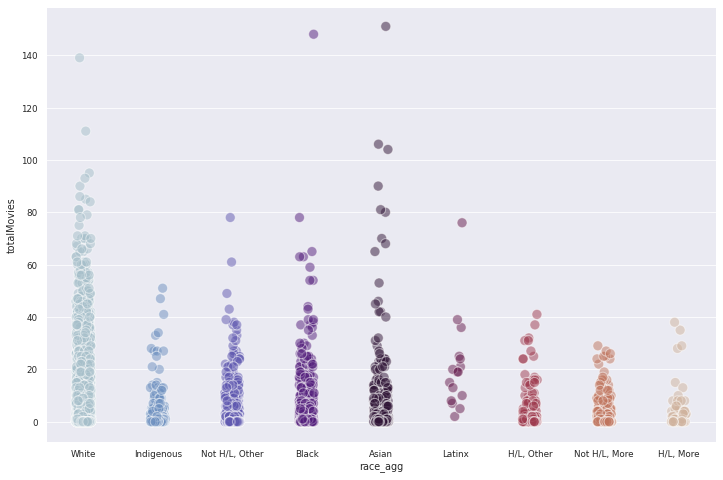

In [42]:
plt.figure(figsize=(12, 8))

sns.stripplot(data=df[df['profession'] == 'actor'], x='race_agg', y='totalMovies', s=10, alpha=0.5, edgecolor='white', linewidth=1, palette='twilight')

plt.show()

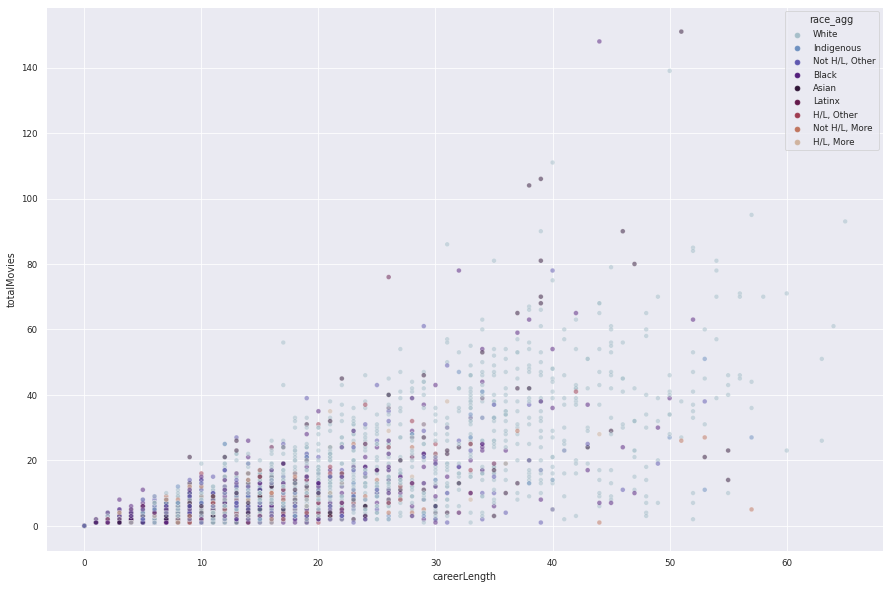

In [43]:
plt.figure(figsize=(15, 10))

sns.scatterplot(data=df[df['profession'] == 'actor'], x='careerLength', y='totalMovies', hue='race_agg', palette='twilight', alpha=0.5)

plt.show()

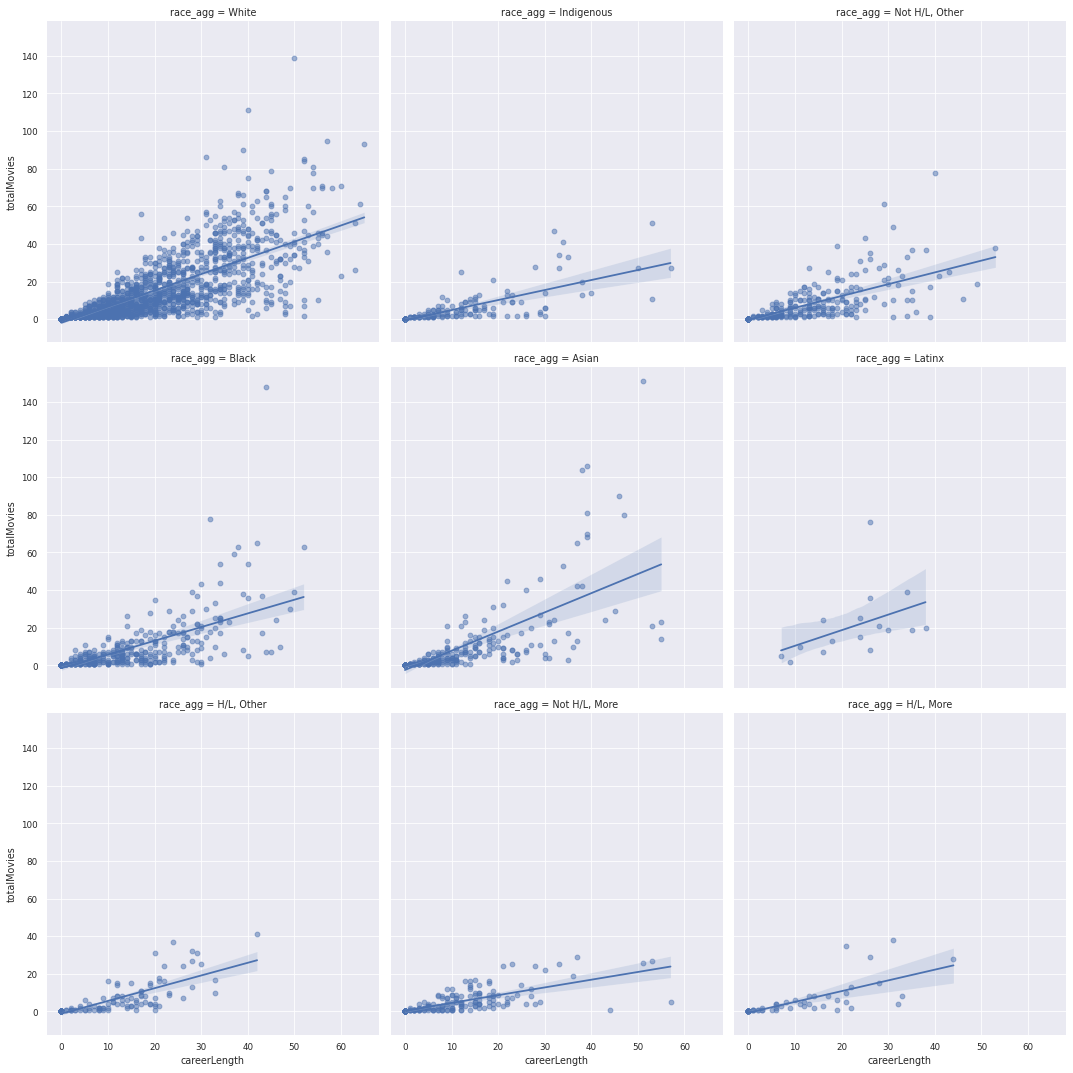

In [44]:
sns.lmplot(data=df[df['profession'] == 'actor'], x='careerLength', y='totalMovies', col='race_agg', col_wrap=3, scatter_kws={'alpha': 0.5})

plt.show()

In [45]:
# https://stackoverflow.com/questions/22852244/how-to-get-the-numerical-fitting-results-when-plotting-a-regression-in-seaborn

def simple_regplot(
    x, y, n_std=2, n_pts=100, ax=None, scatter_kws=None, line_kws=None, ci_kws=None
):
    """ Draw a regression line with error interval. """
    ax = plt.gca() if ax is None else ax

    # calculate best-fit line and interval
    x_fit = sm.add_constant(x)
    fit_results = sm.OLS(y, x_fit).fit()

    eval_x = sm.add_constant(np.linspace(np.min(x), np.max(x), n_pts))
    pred = fit_results.get_prediction(eval_x)

    # draw the fit line and error interval
    ci_kws = {} if ci_kws is None else ci_kws
    ax.fill_between(
        eval_x[:, 1],
        pred.predicted_mean - n_std * pred.se_mean,
        pred.predicted_mean + n_std * pred.se_mean,
        alpha=0.5,
        **ci_kws,
    )
    line_kws = {} if line_kws is None else line_kws
    h = ax.plot(eval_x[:, 1], pred.predicted_mean, **line_kws)

    # draw the scatterplot
    scatter_kws = {} if scatter_kws is None else scatter_kws
    ax.scatter(x, y, c=h[0].get_color(), **scatter_kws)

    return fit_results

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


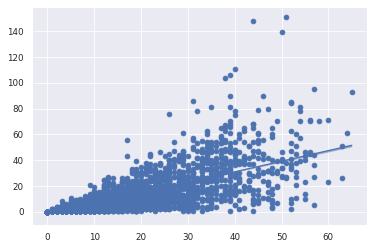

In [46]:
fit_results = simple_regplot(df[df['profession'] == 'actor']['careerLength'], df[df['profession'] == 'actor']['totalMovies'])

In [47]:
def get_coef_pd(res):
  coefs = pd.DataFrame(res.params, columns=['coefs']).reset_index().rename(columns={'index': 'coef names'})
  coefs['std errors'] = res.bse.values
  coefs['diff'] = abs(coefs['coefs']) - 2 * coefs['std errors']
  coefs['significant'] = coefs['diff'] > 0
  coefs['p_values'] = res.pvalues.values

  pd.options.display.float_format = '{:.5f}'.format
  return coefs

In [48]:
def run_reg(profession, race_agg):
  X = pd.DataFrame(df[(df['profession'] == profession) & (df['race_agg'] == race_agg)]['careerLength'])
  X['intercept'] = 1
  y = df[(df['profession'] == profession) & (df['race_agg'] == race_agg)]['totalMovies']
  mod = sm.OLS(y, X)
  res = mod.fit()
  coefs = get_coef_pd(res)
  print(f'\n{profession} - {race_agg}')
  print(f'R-squared: {res.rsquared}')
  print(coefs.iloc[0])
  return res

In [49]:
def run_reg_2(race_agg):
  X = pd.DataFrame(df[df['race_agg'] == race_agg]['careerLength'])
  X['intercept'] = 1
  y = df[df['race_agg'] == race_agg]['totalMovies']
  mod = sm.OLS(y, X)
  res = mod.fit()
  coefs = get_coef_pd(res)
  print(f'\n{race_agg}')
  print(f'R-squared: {res.rsquared}')
  print(coefs.iloc[0])
  return res

In [50]:
def run_reg_3(profession):
  X = pd.DataFrame(df[df['profession'] == profession]['careerLength'])
  X['intercept'] = 1
  y = df[df['profession'] == profession]['totalMovies']
  mod = sm.OLS(y, X)
  res = mod.fit()
  coefs = get_coef_pd(res)
  print(f'\n{profession}')
  print(f'R-squared: {res.rsquared}')
  print(coefs.iloc[0])
  return res

In [51]:
for profession in ['actor', 'actress']:
  for race_agg in list(df.race_agg.unique()):
    res = run_reg(profession, race_agg)


actor - White
R-squared: 0.5806004937612128
coef names     careerLength
coefs               0.86169
std errors          0.01815
diff                0.82538
significant            True
p_values            0.00000
Name: 0, dtype: object

actor - Asian
R-squared: 0.496802267087017
coef names     careerLength
coefs               1.02060
std errors          0.06053
diff                0.89955
significant            True
p_values            0.00000
Name: 0, dtype: object

actor - Indigenous
R-squared: 0.5482250798734836
coef names     careerLength
coefs               0.53212
std errors          0.03795
diff                0.45622
significant            True
p_values            0.00000
Name: 0, dtype: object

actor - H/L, More
R-squared: 0.5219147669372887
coef names     careerLength
coefs               0.57073
std errors          0.07503
diff                0.42067
significant            True
p_values            0.00000
Name: 0, dtype: object

actor - Black
R-squared: 0.453821300115803
coef

In [52]:
for race_agg in list(df.race_agg.unique()):
  res = run_reg_2(race_agg)


White
R-squared: 0.5825786091472782
coef names     careerLength
coefs               0.81272
std errors          0.01352
diff                0.78569
significant            True
p_values            0.00000
Name: 0, dtype: object

Asian
R-squared: 0.47680218551677545
coef names     careerLength
coefs               0.88578
std errors          0.04200
diff                0.80177
significant            True
p_values            0.00000
Name: 0, dtype: object

Indigenous
R-squared: 0.5465921269790507
coef names     careerLength
coefs               0.50549
std errors          0.02850
diff                0.44850
significant            True
p_values            0.00000
Name: 0, dtype: object

H/L, More
R-squared: 0.45080522294866743
coef names     careerLength
coefs               0.51256
std errors          0.05774
diff                0.39708
significant            True
p_values            0.00000
Name: 0, dtype: object

Black
R-squared: 0.4487584350888243
coef names     careerLength
coefs       

In [53]:
for profession in ['actor', 'actress']:
  res = run_reg_3(profession)
  print(res.summary())


actor
R-squared: 0.5560629026967563
coef names     careerLength
coefs               0.81765
std errors          0.01283
diff                0.79198
significant            True
p_values            0.00000
Name: 0, dtype: object
                            OLS Regression Results                            
Dep. Variable:            totalMovies   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     4061.
Date:                Mon, 12 Dec 2022   Prob (F-statistic):               0.00
Time:                        06:36:24   Log-Likelihood:                -12047.
No. Observations:                3244   AIC:                         2.410e+04
Df Residuals:                    3242   BIC:                         2.411e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                        

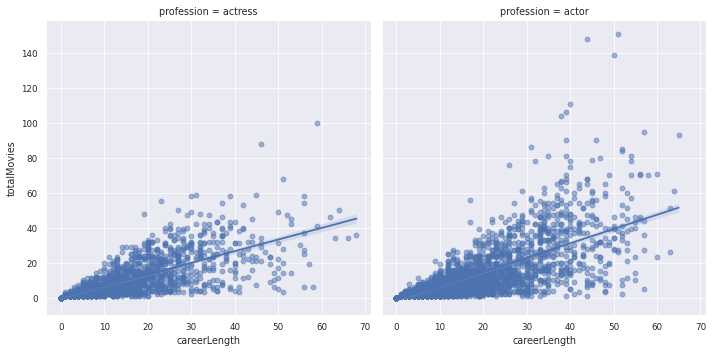

In [54]:
sns.lmplot(data=df, x='careerLength', y='totalMovies', col='profession', scatter_kws={'alpha': 0.5})

plt.show()

## Career length

In [55]:
lengths = df.groupby(by=['profession', 'race_agg'])['careerLength'].agg(['mean', 'std']).reset_index()
lengths

,profession,race_agg,mean,std
0,actor,Asian,10.51034,12.19372
1,actor,Black,12.06808,11.94133
2,actor,"H/L, More",9.92727,10.78726
3,actor,"H/L, Other",10.06349,9.63473
4,actor,Indigenous,11.15854,11.99792
5,actor,Latinx,23.00000,9.35236
6,actor,"Not H/L, More",9.33014,10.31621
7,actor,"Not H/L, Other",10.95427,10.88223
8,actor,White,17.90245,14.63678
9,actress,Asian,9.40000,9.85421


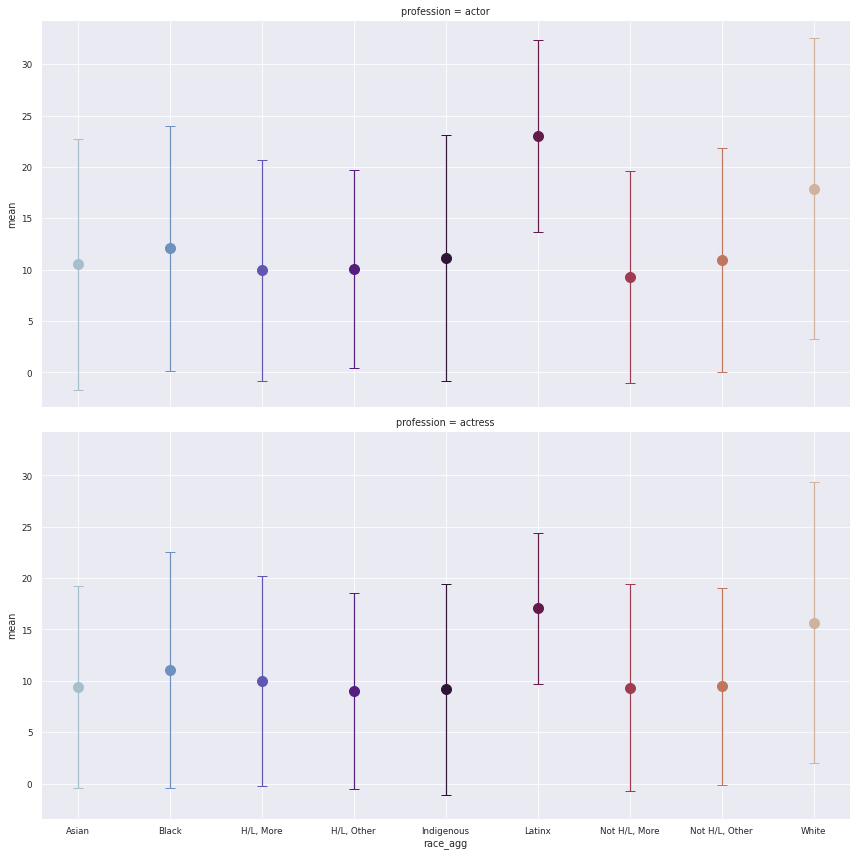

In [56]:
fig = sns.FacetGrid(lengths, row='profession', hue='race_agg', height=6, aspect=2, palette='twilight')
# plt.scatter(movies_actor.race_agg, movies_actor['totalMovies']['mean'])
# fig.map(plt.scatter, 'race_agg', 'mean')
fig.map(plt.errorbar, 'race_agg', 'mean', 'std', fmt='o', capsize=5, markersize=10)
# fig.add_legend()

# plt.title('Total movies')

plt.show()

## Avg. movies

In [57]:
avg_movies = df.groupby(by=['profession', 'race_agg'])['avgMovies'].agg(['mean', 'std']).reset_index()
avg_movies

,profession,race_agg,mean,std
0,actor,Asian,0.65858,0.52407
1,actor,Black,0.58321,0.45888
2,actor,"H/L, More",0.50950,0.34208
3,actor,"H/L, Other",0.52414,0.36499
4,actor,Indigenous,0.49388,0.33464
5,actor,Latinx,0.89918,0.64784
6,actor,"Not H/L, More",0.50377,0.34408
7,actor,"Not H/L, Other",0.60893,0.42809
8,actor,White,0.69746,0.44701
9,actress,Asian,0.62724,0.43976


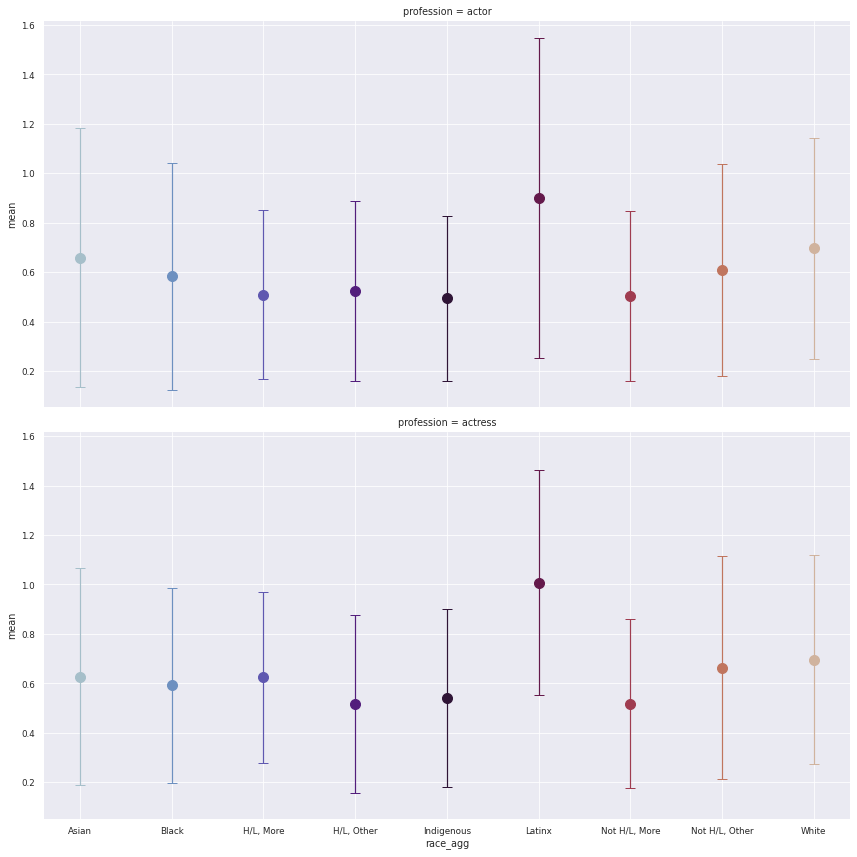

In [58]:
fig = sns.FacetGrid(avg_movies, row='profession', hue='race_agg', height=6, aspect=2, palette='twilight')
# plt.scatter(movies_actor.race_agg, movies_actor['totalMovies']['mean'])
# fig.map(plt.scatter, 'race_agg', 'mean')
fig.map(plt.errorbar, 'race_agg', 'mean', 'std', fmt='o', capsize=5, markersize=10)
# fig.add_legend()

# plt.title('Total movies')

plt.show()

# Leading roles by gender and race

In [59]:
df.head(2)

,nconst,primaryName,race_agg,profession,totalMovies,careerLength,avgMovies
0,nm0000002,Lauren Bacall,White,actress,36,68.00000,0.52941
1,nm0000008,Marlon Brando,White,actor,38,51.00000,0.74510


In [60]:
principals.shape

(14122, 6)

In [61]:
principals.nconst.unique().shape

(5273,)

In [62]:
# It's Jon Daly again, poor guy
set(list(principals.nconst.unique())) - set(df.nconst.to_list())

{'nm1789985'}

In [63]:
principals = principals[principals.nconst != 'nm1789985']
print(principals.nconst.unique().shape)
set(list(principals.nconst.unique())) - set(df.nconst.to_list())

(5272,)


set()

In [64]:
principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0035423,1,nm0000212,actress,\N,"[""Kate McKay""]"
1,tt0035423,2,nm0413168,actor,\N,"[""Leopold""]"
2,tt0035423,3,nm0000630,actor,\N,"[""Stuart Besser""]"
3,tt0035423,4,nm0005227,actor,\N,"[""Charlie McKay""]"
4,tt0118589,1,nm0001014,actress,\N,"[""Billie Frank""]"


In [65]:
race_agg_dict = dict(zip(df.nconst, df.race_agg))

In [66]:
principals['race_agg'] = principals.apply(lambda x: race_agg_dict[x.nconst], axis=1)
principals.head(2)

,tconst,ordering,nconst,category,job,characters,race_agg
0,tt0035423,1,nm0000212,actress,\N,"[""Kate McKay""]",White
1,tt0035423,2,nm0413168,actor,\N,"[""Leopold""]",White


In [67]:
people_list_path = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data/people_list.csv'
people_list = pd.read_csv(people_list_path)
people_list.nconst = people_list.nconst.apply(literal_eval)
print(people_list.shape)
people_list.head()

(3540, 2)


,tconst,nconst
0,tt0035423,"[nm0000212, nm0413168, nm0000630, nm0005227]"
1,tt0118589,"[nm0001014, nm0073160, nm0066586, nm0004771]"
2,tt0120467,"[nm0641168, nm0424682, nm0507915, nm0839486]"
3,tt0120667,"[nm0344435, nm0004821, nm0262635, nm0004695]"
4,tt0120679,"[nm0000161, nm0000547, nm0001691, nm0535502]"


In [68]:
people_list['cast_count'] = people_list.apply(lambda x: len(x.nconst), axis=1)
people_list.head()

,tconst,nconst,cast_count
0,tt0035423,"[nm0000212, nm0413168, nm0000630, nm0005227]",4
1,tt0118589,"[nm0001014, nm0073160, nm0066586, nm0004771]",4
2,tt0120467,"[nm0641168, nm0424682, nm0507915, nm0839486]",4
3,tt0120667,"[nm0344435, nm0004821, nm0262635, nm0004695]",4
4,tt0120679,"[nm0000161, nm0000547, nm0001691, nm0535502]",4


In [69]:
people_list.cast_count.value_counts()

4     3491
3       17
1       13
2        9
7        4
8        3
10       1
5        1
9        1
Name: cast_count, dtype: int64

Any ordering > 4 will be counted as 4

In [70]:
tmp_l = [1, 2, 3, 4, 5, 4, 10, 5, 1, 1]
tmp_t = [i if i < 4 else 4 for i in tmp_l]
tmp_t

[1, 2, 3, 4, 4, 4, 4, 4, 1, 1]

In [71]:
ordering = principals.ordering.to_list()
ordering_4 = [i if i < 4 else 4 for i in ordering]
principals['ordering_4'] = ordering_4
principals.head(2)

,tconst,ordering,nconst,category,job,characters,race_agg,ordering_4
0,tt0035423,1,nm0000212,actress,\N,"[""Kate McKay""]",White,1
1,tt0035423,2,nm0413168,actor,\N,"[""Leopold""]",White,2


In [72]:
principals.ordering_4.value_counts()

4    3548
1    3529
2    3524
3    3520
Name: ordering_4, dtype: int64

In [73]:
principals['gender_role'] = principals['category'] + '_' + principals['ordering_4'].astype('str')
principals.head(2)

,tconst,ordering,nconst,category,job,characters,race_agg,ordering_4,gender_role
0,tt0035423,1,nm0000212,actress,\N,"[""Kate McKay""]",White,1,actress_1
1,tt0035423,2,nm0413168,actor,\N,"[""Leopold""]",White,2,actor_2


In [74]:
principals_count = principals.groupby(by=['race_agg', 'gender_role']).count().reset_index()
principals_count.head()

,race_agg,gender_role,tconst,ordering,nconst,category,job,characters,ordering_4
0,Asian,actor_1,90,90,90,90,90,90,90
1,Asian,actor_2,90,90,90,90,90,90,90
2,Asian,actor_3,121,121,121,121,121,121,121
3,Asian,actor_4,150,150,150,150,150,150,150
4,Asian,actress_1,63,63,63,63,63,63,63


In [75]:
p_count_pivot = principals_count.pivot_table(index='race_agg', columns='gender_role', values='tconst')
p_count_pivot

gender_role,actor_1,actor_2,actor_3,actor_4,actress_1,actress_2,actress_3,actress_4
race_agg,,,,,,,,
Asian,90,90,121,150,63,103,103,108
Black,280,251,265,273,105,172,184,189
"H/L, More",16,22,16,31,16,25,31,26
"H/L, Other",25,56,51,62,19,33,35,65
Indigenous,43,61,65,94,34,41,40,46
Latinx,18,20,23,21,16,30,19,19
"Not H/L, More",66,68,71,111,24,40,52,61
"Not H/L, Other",104,131,149,196,63,73,97,94
White,1825,1383,1365,1297,722,925,833,705


In [76]:
graph_idx = p_count_pivot.sum(axis=1).sort_values(ascending=False).index
p_count_pivot = p_count_pivot.reindex(graph_idx)
p_count_pivot

gender_role,actor_1,actor_2,actor_3,actor_4,actress_1,actress_2,actress_3,actress_4
race_agg,,,,,,,,
White,1825,1383,1365,1297,722,925,833,705
Black,280,251,265,273,105,172,184,189
"Not H/L, Other",104,131,149,196,63,73,97,94
Asian,90,90,121,150,63,103,103,108
"Not H/L, More",66,68,71,111,24,40,52,61
Indigenous,43,61,65,94,34,41,40,46
"H/L, Other",25,56,51,62,19,33,35,65
"H/L, More",16,22,16,31,16,25,31,26
Latinx,18,20,23,21,16,30,19,19


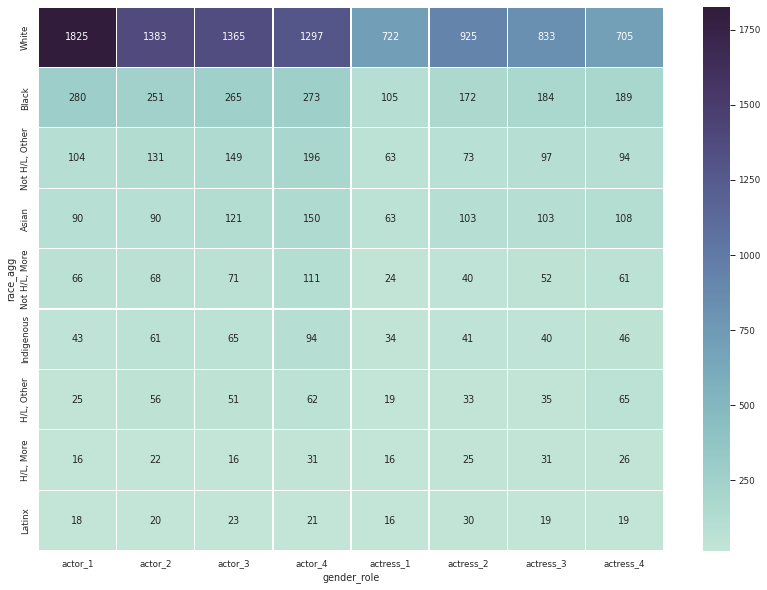

In [77]:
plt.figure(figsize=(14, 10))

sns.heatmap(p_count_pivot, linewidths=0.3, annot=True, fmt='n', cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True))
# plt.xlabel('Gender')
# plt.ylabel('Predicted race')
# plt.title('Count of actors and actresses by race')

plt.show()

In [78]:
actor_roles = p_count_pivot.iloc[:, :4]
actress_roles = p_count_pivot.iloc[:, 4:]
actor_roles.columns = [f'Role #{i}' for i in range(1, 5)]
actress_roles.columns = [f'Role #{i}' for i in range(1, 5)]

In [79]:
actor_roles_total = pd.DataFrame(actor_roles.sum().rename('Total')).transpose()
actress_roles_total = pd.DataFrame(actress_roles.sum().rename('Total')).transpose()

p_total = pd.DataFrame(p_count_pivot.sum().rename('Total')).transpose()

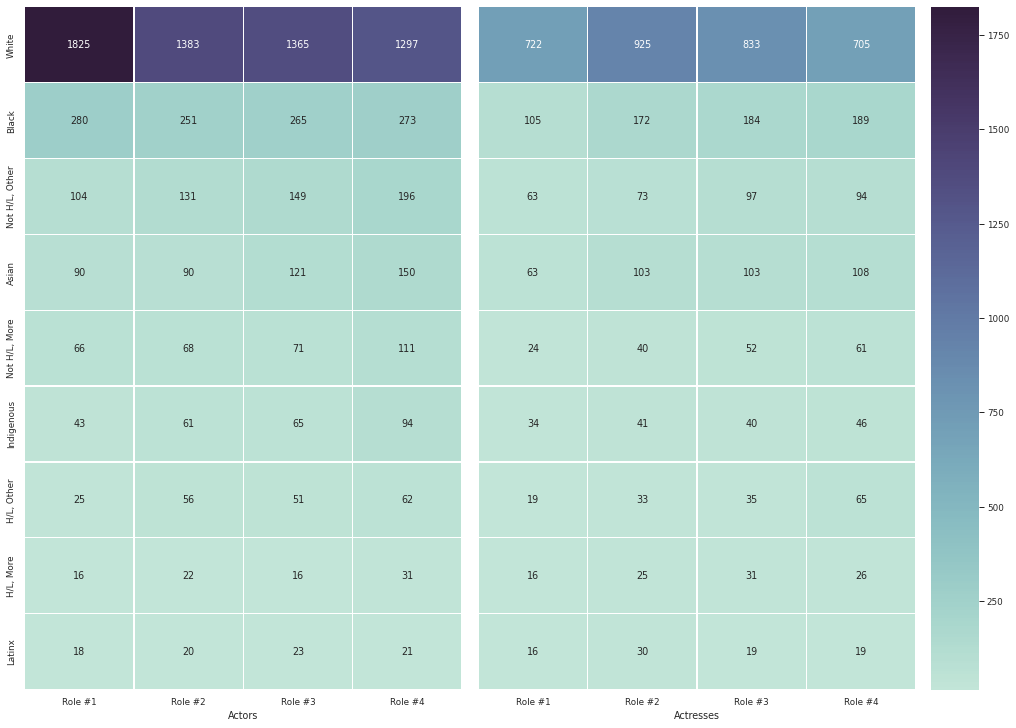

In [80]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 10), sharex=True, sharey=True, constrained_layout=True)

vmin, vmax = p_count_pivot.values.min(), p_count_pivot.values.max()

sns.heatmap(actor_roles, linewidths=0.3, annot=True, fmt='n', cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True), ax=ax[0], cbar=False, vmin=vmin)
sns.heatmap(actress_roles, linewidths=0.3, annot=True, fmt='n', cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True), ax=ax[1], vmax=vmax)

ax[0].set_xlabel('Actors')
ax[0].set_ylabel('')
ax[1].set_xlabel('Actresses')
ax[1].set_ylabel('')

# f.supxlabel('Gender')
# f.supylabel('Predicted race')

plt.show()

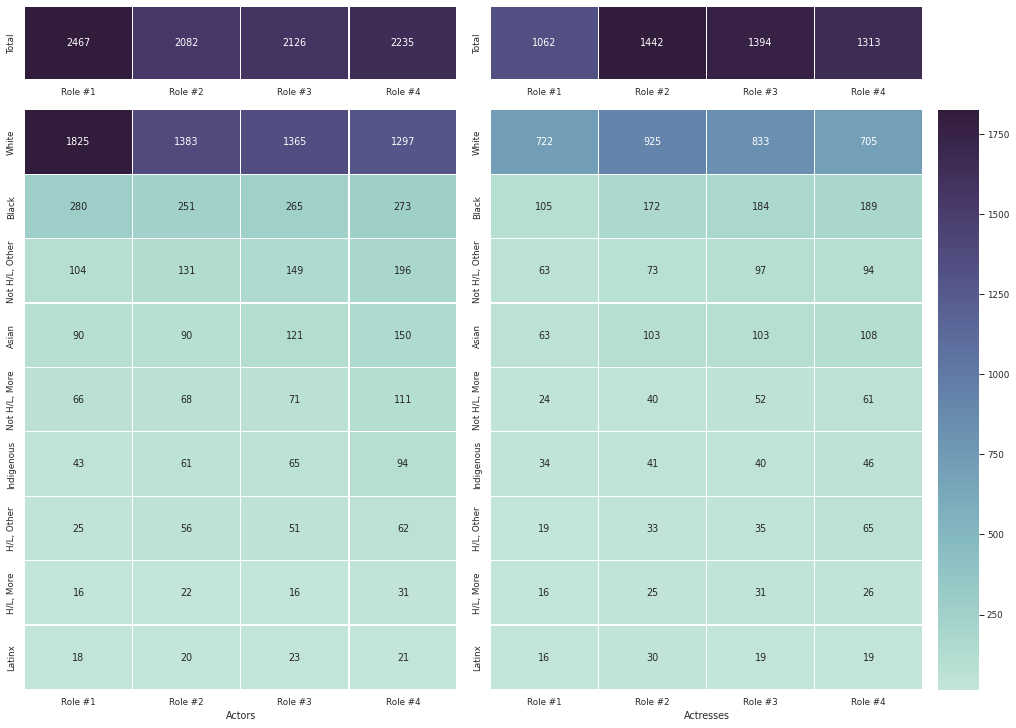

In [81]:
f, (ax0, ax1) = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), gridspec_kw={'height_ratios': [1, 8]}, constrained_layout=True)

vmin, vmax = p_count_pivot.values.min(), p_count_pivot.values.max()

sns.heatmap(actor_roles_total, linewidths=0.3, annot=True, fmt='n', cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True), ax=ax0[0], cbar=False, vmin=vmin)
sns.heatmap(actress_roles_total, linewidths=0.3, annot=True, fmt='n', cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True), ax=ax0[1], cbar=False, vmin=vmin)

sns.heatmap(actor_roles, linewidths=0.3, annot=True, fmt='n', cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True), ax=ax1[0], cbar=False, vmin=vmin)
sns.heatmap(actress_roles, linewidths=0.3, annot=True, fmt='n', cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True), ax=ax1[1], vmax=vmax)

ax1[0].set_xlabel('Actors')
ax1[0].set_ylabel('')
ax1[1].set_xlabel('Actresses')
ax1[1].set_ylabel('')

# f.supxlabel('Gender')
# f.supylabel('Predicted race')

plt.show()

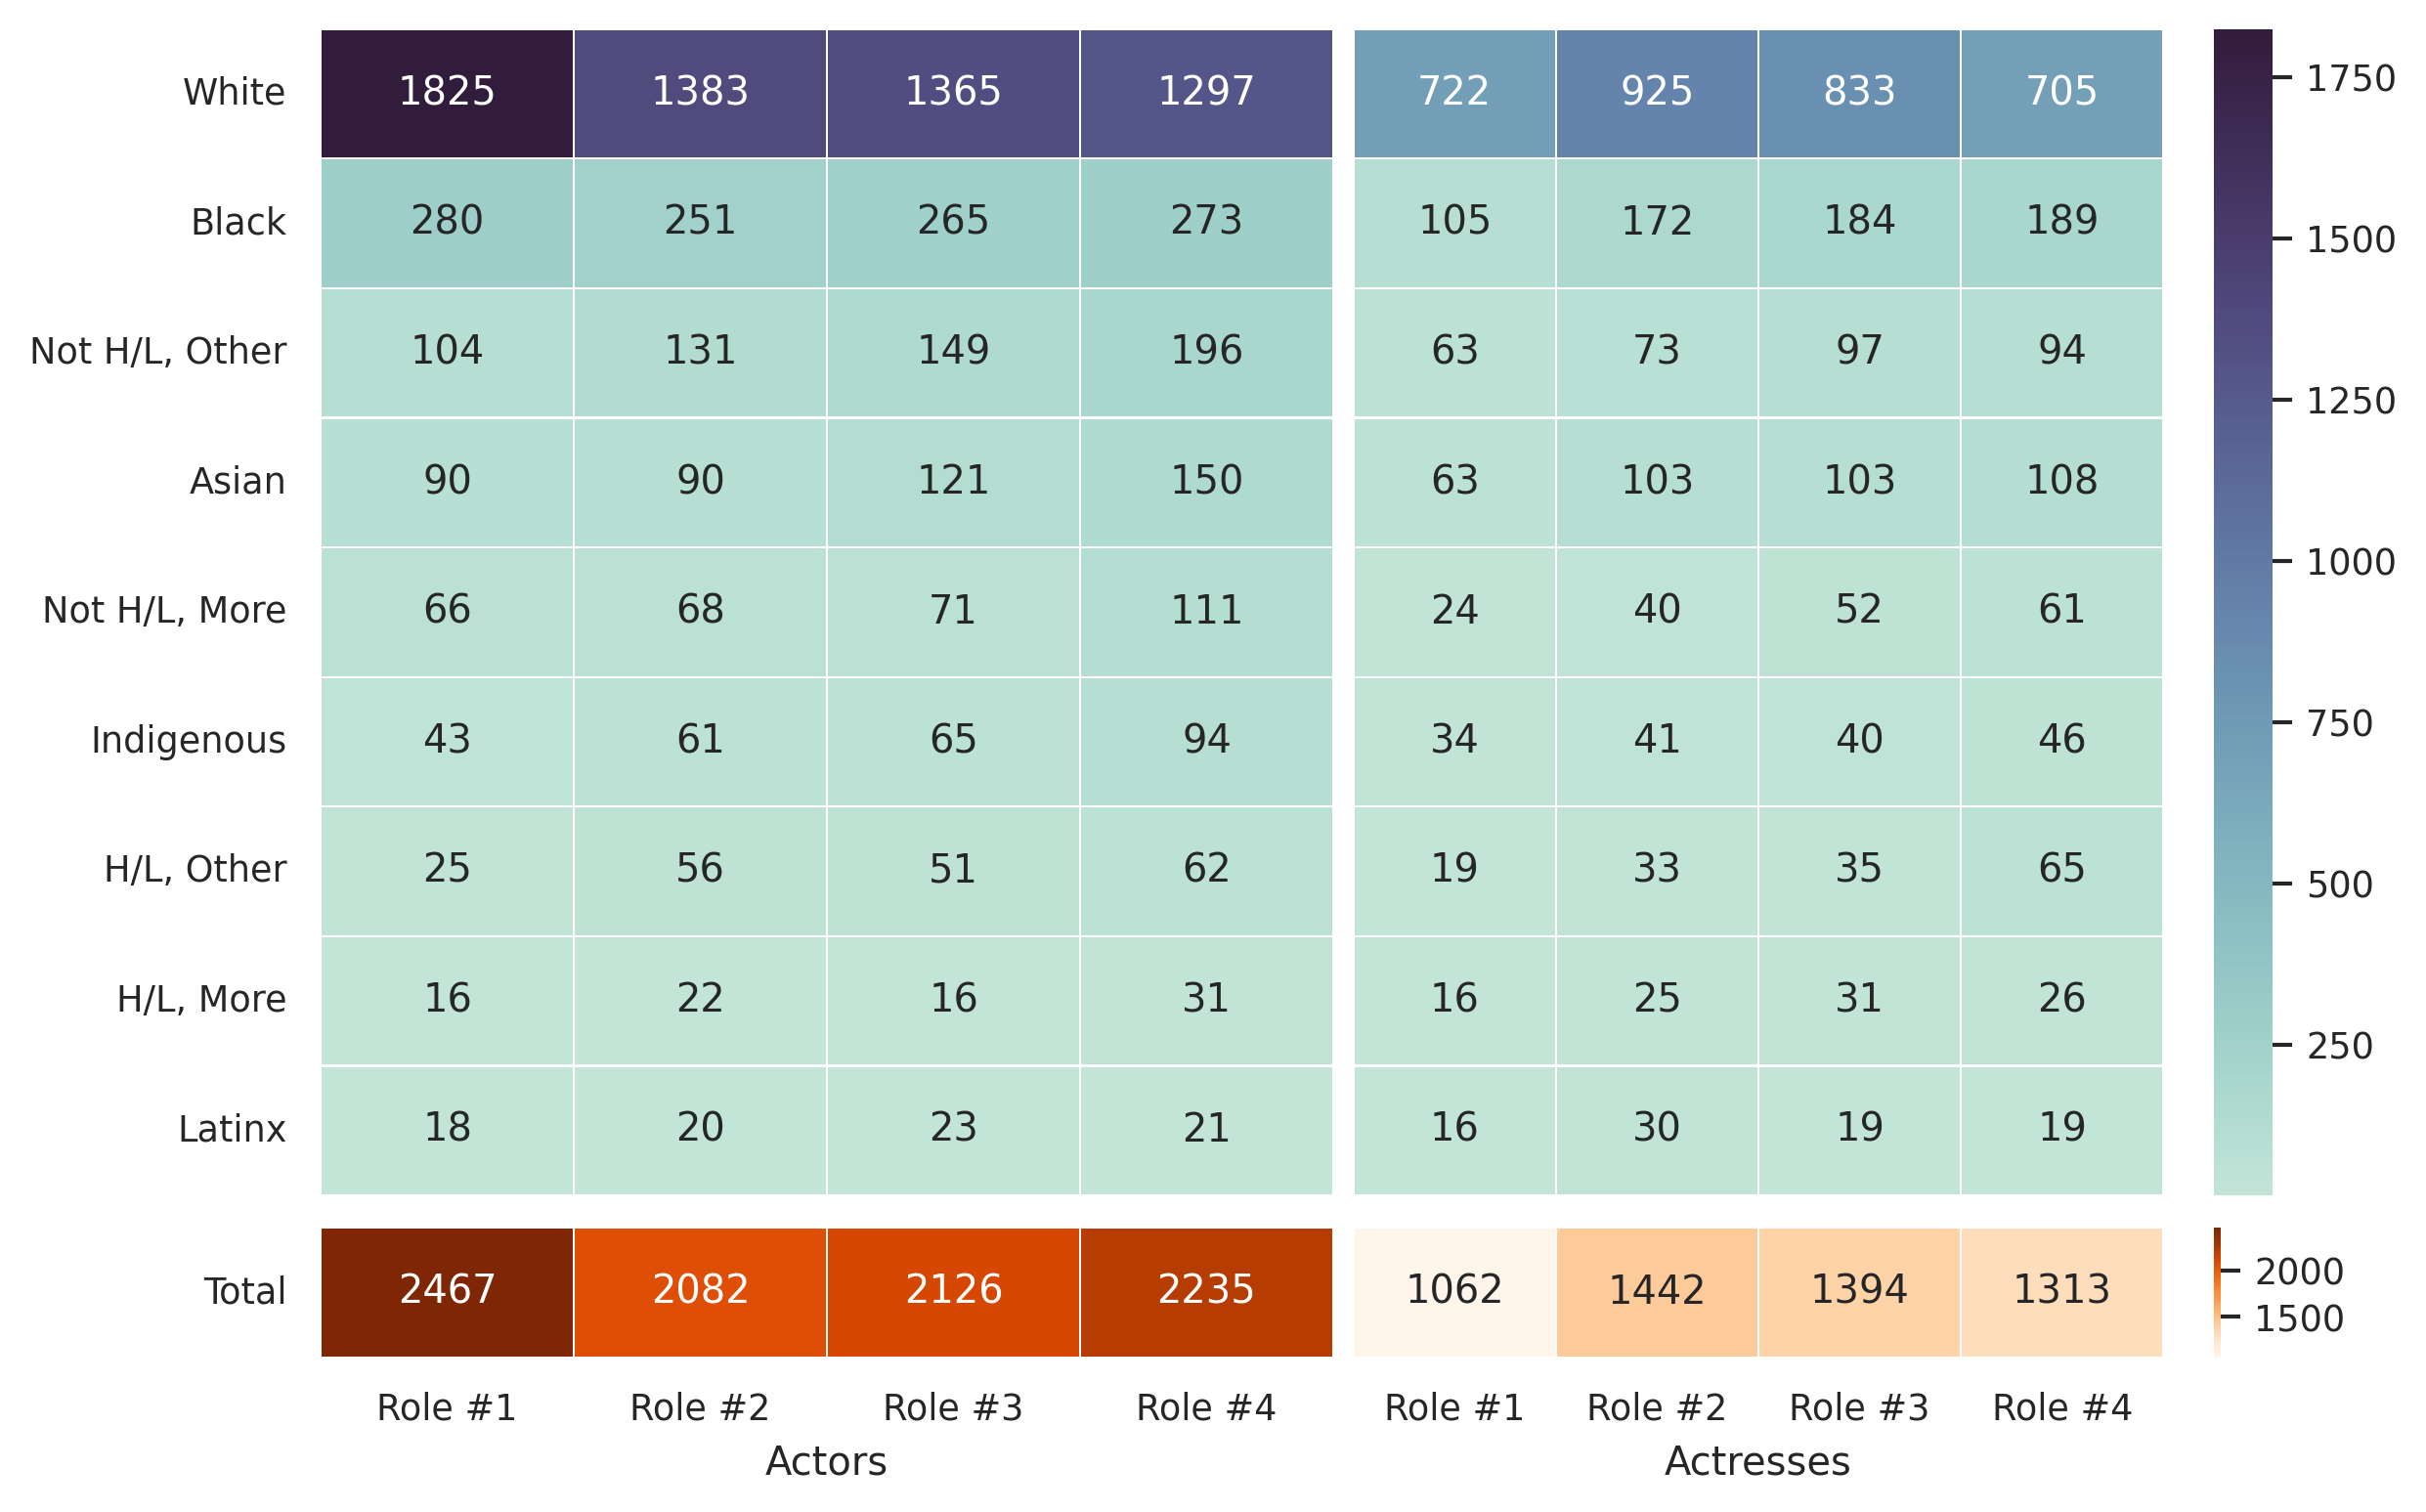

In [89]:
f = plt.figure(figsize=(9, 6), dpi=300)
outer = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[9, 1], hspace=0.05)

inner0  = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=2, subplot_spec=outer[0], wspace=0.02)
vmin0, vmax0 = p_count_pivot.values.min(), p_count_pivot.values.max()

ax0 = plt.Subplot(f, inner0[0])
sns.heatmap(actor_roles, linewidths=0.3, annot=True, fmt='n', cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True), cbar=False, vmin=vmin0, ax=ax0)
# ax0.set_xlabel('Actors')
ax0.set_ylabel('')
ax0.xaxis.set_tick_params(labelbottom=False)
f.add_subplot(ax0)

ax1 = plt.Subplot(f, inner0[1])
sns.heatmap(actress_roles, linewidths=0.3, annot=True, fmt='n', cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True), vmax=vmax0, ax=ax1)
# ax1.set_xlabel('Actresses')
ax1.set_ylabel('')
ax1.xaxis.set_tick_params(labelbottom=False)
ax1.yaxis.set_tick_params(labelleft=False)
f.add_subplot(ax1)

inner1 = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=2, subplot_spec=outer[1], wspace=0.02)
vmin1 = min(actor_roles_total.values.min(), actress_roles_total.values.min())
vmax1 = max(actor_roles_total.values.max(), actress_roles_total.values.max())

ax2 = plt.Subplot(f, inner1[0])
sns.heatmap(actor_roles_total, linewidths=0.3, annot=True, fmt='n', cmap='Oranges', cbar=False, vmin=vmin1, ax=ax2)
ax2.set_xlabel('Actors')
ax2.tick_params(labelrotation=0)
f.add_subplot(ax2)

ax3 = plt.Subplot(f, inner1[1])
sns.heatmap(actress_roles_total, linewidths=0.3, annot=True, fmt='n', cmap='Oranges', vmax=vmax1, ax=ax3)
ax3.yaxis.set_tick_params(labelleft=False)
ax3.set_xlabel('Actresses')
ax3.tick_params(labelrotation=0)
f.add_subplot(ax3)

f.show()

In [83]:
df.profession.value_counts()

actor      3244
actress    2028
Name: profession, dtype: int64

In [84]:
df.head(2)

,nconst,primaryName,race_agg,profession,totalMovies,careerLength,avgMovies
0,nm0000002,Lauren Bacall,White,actress,36,68.00000,0.52941
1,nm0000008,Marlon Brando,White,actor,38,51.00000,0.74510
